In [11]:
import pandas as pd

df = pd.read_excel("contoh_data_bermasalah.xlsx")

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar
1,118,Pengguna_118,51,Yogyakarta,9819256,Aktif,2023-06-26
2,29,Pengguna_29,37,Jakarta,4991886,Aktif,2023-07-20
3,119,Pengguna_119,31,Medan,19094979,Aktif,2023-05-17
4,44,Pengguna_44,54,Makassar,15843052,Tidak Aktif,2023-05-10
5,124,Pengguna_124,26,Bandung,86377074,Pending,2023-05-05


In [12]:
# Tampilkan 5 baris pertama dari DataFrame
print("Lima baris pertama dari DataFrame:")
display(df.head())

# Cetak informasi ringkasan tentang DataFrame
print("\nInformasi tentang DataFrame:")
df.info()

# Hitung dan tampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah nilai yang hilang di setiap kolom:")
df.isnull().sum()

Lima baris pertama dari DataFrame:


,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar
1,118,Pengguna_118,51,Yogyakarta,9819256,Aktif,2023-06-26
2,29,Pengguna_29,37,Jakarta,4991886,Aktif,2023-07-20
3,119,Pengguna_119,31,Medan,19094979,Aktif,2023-05-17
4,44,Pengguna_44,54,Makassar,15843052,Tidak Aktif,2023-05-10
5,124,Pengguna_124,26,Bandung,86377074,Pending,2023-05-05



Informasi tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 1 to 160
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              160 non-null    int64         
 1   Nama            160 non-null    object        
 2   Usia            160 non-null    int64         
 3   Kota            160 non-null    object        
 4   Pendapatan      160 non-null    int64         
 5   Status          144 non-null    object        
 6   Tanggal Daftar  160 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.9+ KB

Jumlah nilai yang hilang di setiap kolom:


ID                 0
Nama               0
Usia               0
Kota               0
Pendapatan         0
Status            16
Tanggal Daftar     0
dtype: int64

In [13]:
status_mode = df['Status'].mode()[0]
print(f"Nilai modus untuk kolom 'Status': {status_mode}")

Nilai modus untuk kolom 'Status': Aktif


In [14]:
# Mengisi nilai yang hilang pada kolom 'Status' dengan modus
df['Status'] = df['Status'].fillna(status_mode)

# Verifikasi bahwa tidak ada nilai yang hilang di kolom 'Status'
missing_values_after_fill = df['Status'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Status' setelah pengisian: {missing_values_after_fill}")


Jumlah nilai yang hilang di kolom 'Status' setelah pengisian: 0


In [15]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"\nJumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat tersebut
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada baris duplikat lagi
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama dari DataFrame setelah pembersihan:")
    display(df.head())


Jumlah baris duplikat: 10

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama dari DataFrame setelah pembersihan:


,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar
1,118,Pengguna_118,51,Yogyakarta,9819256,Aktif,2023-06-26
2,29,Pengguna_29,37,Jakarta,4991886,Aktif,2023-07-20
3,119,Pengguna_119,31,Medan,19094979,Aktif,2023-05-17
4,44,Pengguna_44,54,Makassar,15843052,Tidak Aktif,2023-05-10
5,124,Pengguna_124,26,Bandung,86377074,Pending,2023-05-05


In [16]:
# Indenifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Nama
Nama
Pengguna_118    1
Pengguna_29     1
Pengguna_119    1
Pengguna_44     1
Pengguna_124    1
               ..
Pengguna_8      1
Pengguna_35     1
Pengguna_13     1
Pengguna_1      1
Pengguna_69     1
Name: count, Length: 150, dtype: int64

Kolom: Kota
Kota
Surabaya      27
Palembang     20
Semarang      18
Makassar      16
Jakarta       14
Yogyakarta    13
Jakarta       13
Bandung       12
Medan          9
bandung        8
Name: count, dtype: int64

Kolom: Status
Status
Aktif          76
Tidak Aktif    54
Pending        20
Name: count, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,ID,Usia,Pendapatan
count,150.000000,150.000000,1.500000e+02
mean,75.500000,38.280000,1.362082e+07
std,43.445368,12.720073,1.181358e+07
min,1.000000,18.000000,3.148508e+06
25%,38.250000,27.000000,7.722654e+06
50%,75.500000,37.000000,1.188468e+07
75%,112.750000,50.000000,1.608329e+07
max,150.000000,59.000000,8.637707e+07



Distribusi kolom 'Kota' setelah standarisasi:
Kota
jakarta       27
surabaya      27
bandung       20
palembang     20
semarang      18
makassar      16
yogyakarta    13
medan          9
Name: count, dtype: int64


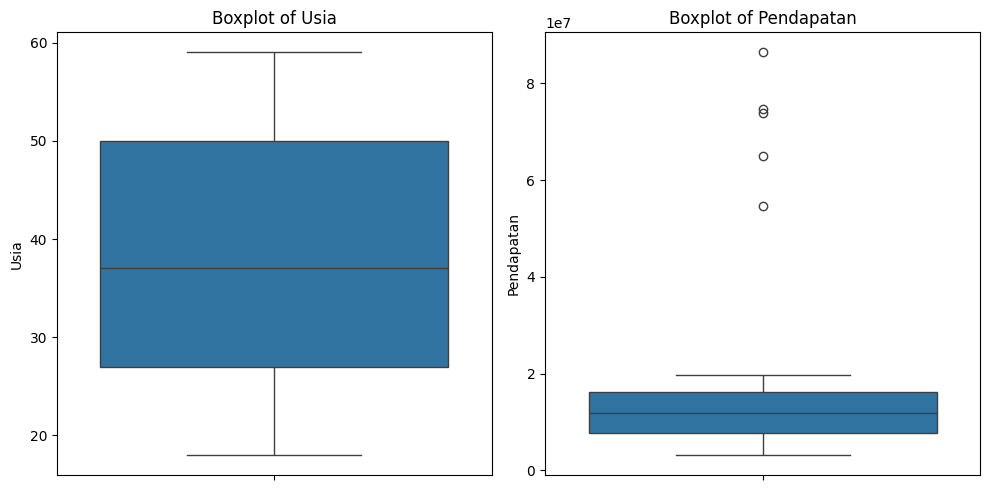

In [17]:
# Standarisasi kolom 'Kota'
df['Kota'] = df['Kota'].str.lower().str.strip()

# Verifikasi setelah standarisasi
print("\nDistribusi kolom 'Kota' setelah standarisasi:")
print(df['Kota'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi Boxplot
numerical_cols_outliers = ['Usia', 'Pendapatan']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


Statisik deskriptif untuk 'Pendapatan' setelah capping (upper limit = 20000000):


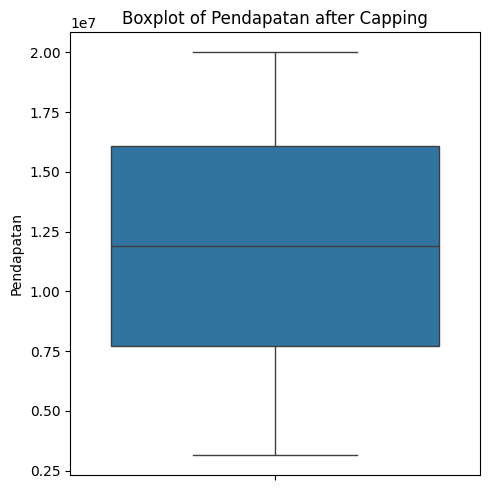

In [18]:
# Handle outliners in 'Pendapatan' using capping
# Determine a reasonible upper limit (e.g., based on the 95th percentile or visual inspection)
# From the describe output, the max is 8.6e7, while 75% is around 1.6e7.
# Let's cap at value slightly above the 75th percentile, e.g., 30,000,000.
upper_limit = 20000000
df['Pendapatan'] = df['Pendapatan'].clip(upper=upper_limit)

print(f"\nStatisik deskriptif untuk 'Pendapatan' setelah capping (upper limit = {upper_limit}):")

# Visualisasi 'Pendapatan' setelah capping
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Pendapatan')
plt.title('Boxplot of Pendapatan after Capping')
plt.ylabel('Pendapatan')
plt.tight_layout()
plt.show()

In [19]:
df['Tanggal Daftar'] = pd.to_datetime(df['Tanggal Daftar'])
df['Tahun_Daftar'] = df['Tanggal Daftar'].dt.year
df['Bulan_Daftar'] = df['Tanggal Daftar'].dt.month
df['Hari_Daftar'] = df['Tanggal Daftar'].dt.day

display(df.head())

,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar,Tahun_Daftar,Bulan_Daftar,Hari_Daftar
1,118,Pengguna_118,51,yogyakarta,9819256,Aktif,2023-06-26,2023,6,26
2,29,Pengguna_29,37,jakarta,4991886,Aktif,2023-07-20,2023,7,20
3,119,Pengguna_119,31,medan,19094979,Aktif,2023-05-17,2023,5,17
4,44,Pengguna_44,54,makassar,15843052,Tidak Aktif,2023-05-10,2023,5,10
5,124,Pengguna_124,26,bandung,20000000,Pending,2023-05-05,2023,5,5


In [20]:
output_file_name = 'data_bersih.xlsx'
df.to_excel(output_file_name, index=False)

print(f"DataFrame telah berhasil disimpan ke dalam file '{output_file_name}'")

DataFrame telah berhasil disimpan ke dalam file 'data_bersih.xlsx'
